# Attention Walmart Shoppers
### A Walmart retail analysis

The data was originally retrieved from:
 -   https://www.kaggle.com/rutuspatel/retail-analysis-with-walmart-sales-data
 - https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

### Data Dictionary

| Target       |  Data Type       | Description                     |
|--------------|------------------|---------------------------------|
| Weekly_Sales |   float64        | Sales in USD per week by store  |


| Column        |  Data Type       | Description                                      |  
|---------------|------------------|--------------------------------------------------|
| Store         |     int64        | unique identifier for store  (1-45)              |
| Date          |     object       | Date of transaction                              |
| Holiday_Flag  |     int64        | indicator of a Holiday week (boolean)            |
| Temperature   |     float64      | temperature in Farenheight                       |
| Fuel_Price    |     float64      | cost of fuel(in USD) in region                   |
| CPI           |     float64      | Prevailing consumer price index, cost of goods   |
| Unemployment  |     float64      | Prevailing unemployment rate                     |

## Goal:
- to predict weekly sales price for a store

## Think about...
- What is your goal?
- what is your TARGET? drivers for that target?
- what is one oberservation? what does one row from your dataset represent?

## Daily meetings
- standup doc
- shared knowledge doc

### Three important Questions
- what did you work on since we last talked?
- what are you planning on working on next?
- what are your blockers?

In [1]:
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#custom modules
import wrangle
import new_wrangle

<hr style="border:2px solid black"> </hr>

# Acquire

In [2]:
df= new_wrangle.acquire_data()

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,A,151315
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,A,151315
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,A,151315
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,A,151315
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,A,151315


In [4]:
#check for nulls, dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Type          6435 non-null   object 
 9   Size          6435 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 553.0+ KB


<hr style="border:2px solid black"> </hr>

# Prepare

In [5]:
#import the cleaned data using new_wrangle.py
df= new_wrangle.wrangle_walmart()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-01-10 to 2012-12-10
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_id         6435 non-null   int64  
 1   weekly_sales     6435 non-null   float64
 2   holiday_flag     6435 non-null   int64  
 3   temperature      6435 non-null   int64  
 4   fuel_price       6435 non-null   float64
 5   CPI              6435 non-null   float64
 6   unemployment     6435 non-null   float64
 7   type             6435 non-null   object 
 8   store_size       6435 non-null   int64  
 9   month            6435 non-null   object 
 10  year             6435 non-null   int64  
 11  quarter          6435 non-null   int64  
 12  deflated_series  6435 non-null   float64
 13  sales_delta      6390 non-null   float64
 14  season           6435 non-null   object 
dtypes: float64(6), int64(6), object(3)
memory usage: 804.4+ KB


In [7]:
#take a look at the data
df.tail()

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,type,store_size,month,year,quarter,deflated_series,sales_delta,season
Date,,,,,,,,,,,,,,,
2012-12-10,41,1409544.97,0,39,3.76,199.054,6.195,A,196321,December,2012,4,7081.22,9384.02,Winter
2012-12-10,16,491817.19,0,43,3.76,199.054,5.847,B,57197,December,2012,4,2470.77,20535.51,Winter
2012-12-10,10,1713889.11,0,76,4.47,131.108,6.943,B,126512,December,2012,4,13072.35,-45082.27,Winter
2012-12-10,25,697317.41,0,43,4.00,216.115,7.293,B,128107,December,2012,4,3226.60,-2219.32,Winter
2012-12-10,2,1900745.13,0,60,3.60,223.015,6.170,A,202307,December,2012,4,8522.95,-97575.91,Winter


In [8]:
#train test split
X_train, y_train, X_test, y_test = new_wrangle.train_test(df,'weekly_sales')

X_train -> (5355, 14)
X_test -> (1080, 14)


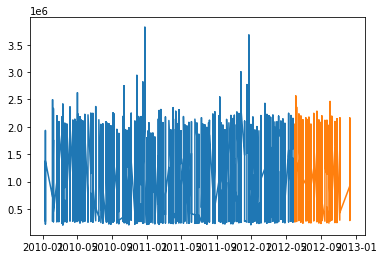

In [9]:
##human based split
plt.plot(train.index, train.weekly_sales)
plt.plot(test.index, test.weekly_sales)

<hr style="border:2px solid black"> </hr>

# Explore

In [10]:
#count of season
df.season.value_counts()

Summer    2835
Winter    1440
Spring    1170
Fall       990
Name: season, dtype: int64

In [11]:
df.quarter.value_counts()

2    1755
3    1710
1    1485
4    1485
Name: quarter, dtype: int64

In [ ]:
#bivariate

In [ ]:
# carreglos con la categoría y número correspondiende
cat_col = joined.select_dtypes(include='object').columns
num_col = joined.select_dtypes(include='number').columns

In [ ]:
#univariate

In [ ]:
#multivariate

In [ ]:
#timeseries?